In [6]:
import os


from matplotlib import pyplot as plt
import seaborn as sb
import pandas as pd

In [127]:
def get_tsv_files(path):
    """Return individual paths to all data and events json files in given directory.
    
    Arguments
    ---------
    path (string/path) : Path to directory where json files are located.
    
    Returns
    -------
    data_ (list) : Sorted list of all json data files
    evs_ (list) : Sorted list of all json events files
    """
    data_ = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".tsv"):
                data_.append(os.path.join(root, file))
    data_.sort()
    return data_


In [138]:
inpath = '/Users/richardkoehler/OneDrive - Charité - Universitätsmedizin Berlin/BIDS Beijing derivatives/derivatives'
files = get_tsv_files(inpath)
print(files)

['/Users/richardkoehler/OneDrive - Charité - Universitätsmedizin Berlin/BIDS Beijing derivatives/derivatives/var-1000ms_sampfreq100Hz/Beijing_LDA_scores_var-1000ms_sampfreq-100Hz_Group-Fold10.tsv', '/Users/richardkoehler/OneDrive - Charité - Universitätsmedizin Berlin/BIDS Beijing derivatives/derivatives/var-1000ms_sampfreq100Hz/Beijing_LDA_scores_var-1000ms_sampfreq-100Hz_Shuffled-Fold10.tsv', '/Users/richardkoehler/OneDrive - Charité - Universitätsmedizin Berlin/BIDS Beijing derivatives/derivatives/var-1000ms_sampfreq10Hz/Beijing_LDA_scores_var-1000ms_sampfreq-10Hz_Group-Fold10.tsv', '/Users/richardkoehler/OneDrive - Charité - Universitätsmedizin Berlin/BIDS Beijing derivatives/derivatives/var-1000ms_sampfreq10Hz/Beijing_LDA_scores_var-1000ms_sampfreq-10Hz_Shuffled-Fold10.tsv', '/Users/richardkoehler/OneDrive - Charité - Universitätsmedizin Berlin/BIDS Beijing derivatives/derivatives/var-100ms_sampfreq10Hz/Beijing_LDA_scores_var-100ms_sampfreq-10Hz_Group-Fold10.tsv', '/User

In [146]:
df_list = []
for file in files:
    var, sf = get_var_sf(os.path.basename(file))
    df = pd.read_csv(file,sep='\t', index_col=[0], header=[0])
    #df = df.drop(columns='Mean', index='Mean')
    #df = df.stack()
    #df = df.reset_index(level=[0,1])
    #df['Features'] = var + ' ' + sf
    df_list.append(df)

In [148]:
df = pd.concat(df_list)
features = df.Features.unique()

In [150]:
df

,Subject,Channels,Accuracy,Features
0,FOG006,All,0.816,1000ms 100Hz Group
1,FOG006,All ECoG,0.832,1000ms 100Hz Group
2,FOG006,All LFP,0.690,1000ms 100Hz Group
3,FOG008,All,0.762,1000ms 100Hz Group
4,FOG008,All ECoG,0.810,1000ms 100Hz Group
...,...,...,...,...
13,FOG013,All ECoG,0.603,100ms 10Hz Shuffled
14,FOG013,All LFP,0.600,100ms 10Hz Shuffled
15,FOGC001,All,0.806,100ms 10Hz Shuffled
16,FOGC001,All ECoG,0.770,100ms 10Hz Shuffled


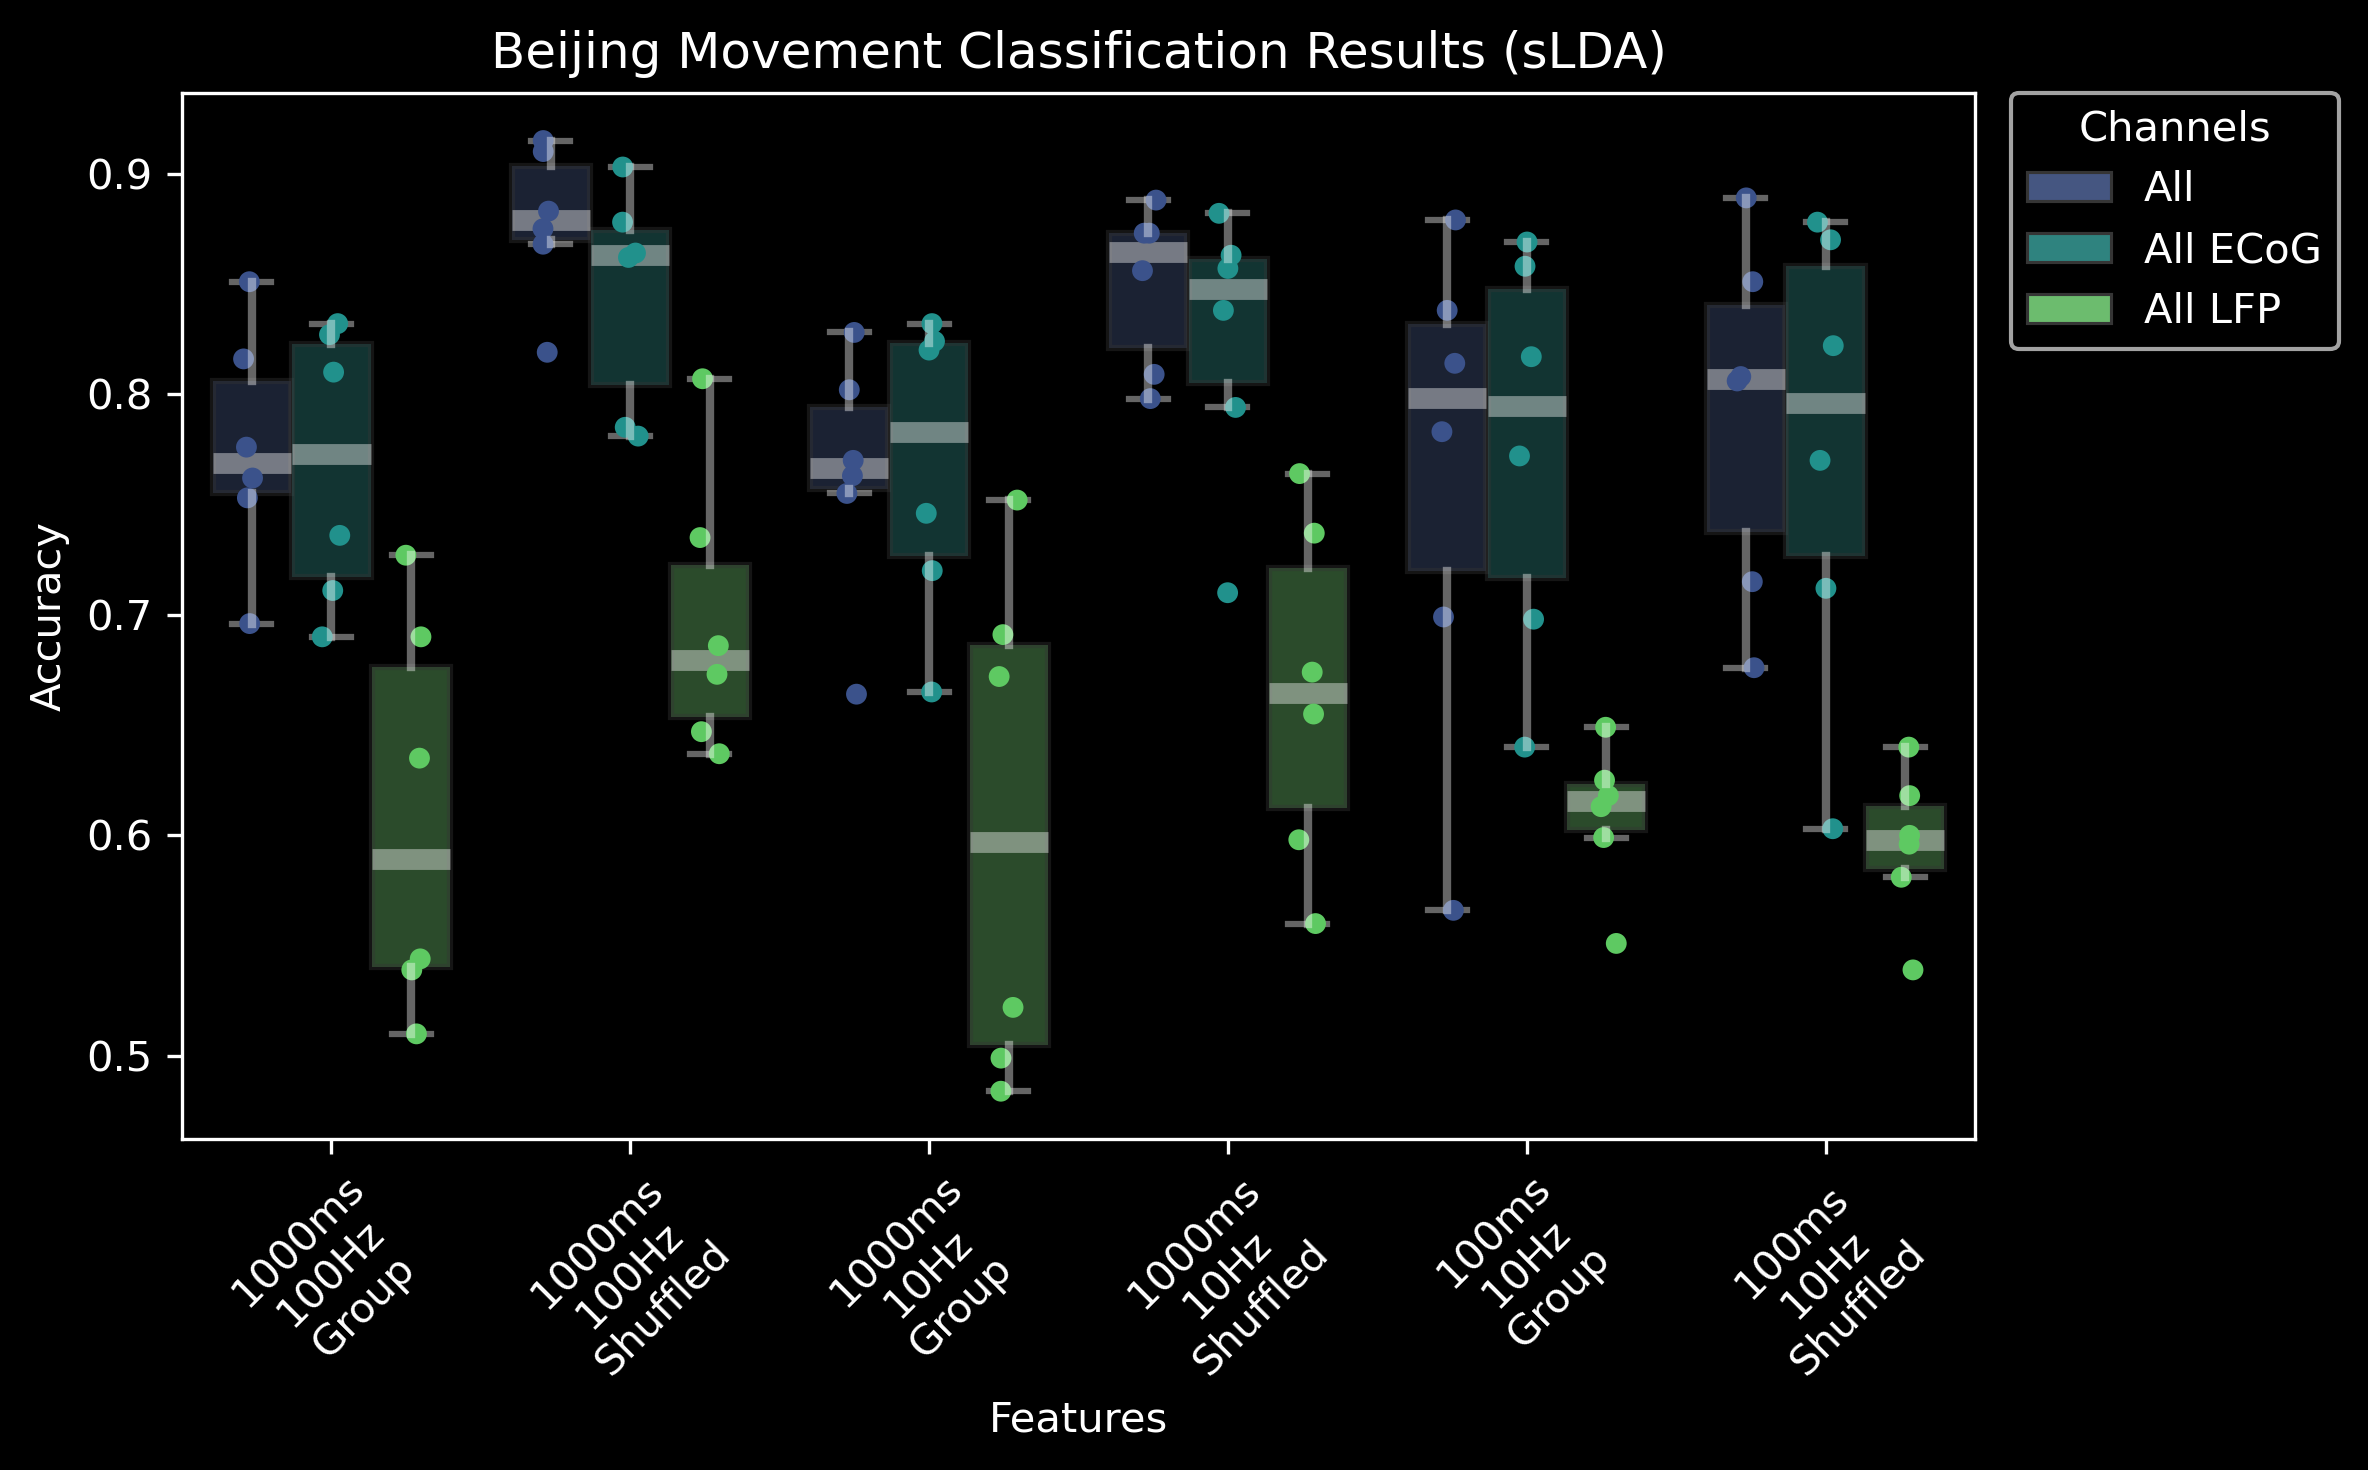

In [222]:
plt.style.use('dark_background')
alpha_box = 0.4
plt.figure(figsize=(8,5), dpi=300)
sb.boxplot(x="Features", y="Accuracy", hue="Channels", order=features, 
           data=df, palette="viridis",
           showmeans=False, boxprops=dict(alpha=alpha_box), showcaps=True, showbox=True, 
           showfliers=False, notch=False,
           whiskerprops={'linewidth':2, "zorder":10, "alpha":alpha_box, "color":'white'},
           capprops={"alpha":alpha_box,"color":'white'},
           medianprops=dict(linestyle='-.', linewidth=5, color="white", alpha=alpha_box))

ax = sb.stripplot(x="Features", y="Accuracy", hue="Channels", order=features, 
             data=df,palette="viridis", dodge=True, s=5)

plt.xticks(rotation=45)
xlabels = [item.get_text() for item in ax.get_xticklabels()]
new_xlabels = [xtick.replace(' ','\n') for xtick in xlabels]
ax.set_xticklabels(new_xlabels) 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[:len(handles)//2], labels[:len(labels)//2], bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., title='Channels')
plt.title("Beijing Movement Classification Results (sLDA)")
plt.tight_layout()
plt.savefig(os.path.join(inpath, 'beijing_movement_classification_sLDA_dark.png'))

In [ ]:
,edgecolor='white'